# Description

**Work for an online store that sells worldwide and specialize in video games, trying to plan our advertising campaigns for the next year.
We need to evaluate which games to promote according to their popularity. the popularity varies according to the data we have recived. on which platform the game is played, genre, year of release, sales in different parts of the world, critics and users scores and rating.**

**I will ask several interesting questions about the data and try to answer them using our tools and understand how to plan our advertising accordingly.**

**are some games or genres more popular on one platform than the others? is there a specific platform that is more popular? 
are there genres that more popular in specific areas of the world?
is there correlation between the average yearly sales revenue and the score of the game?
are games that rated for adults lose a big part of the potential gamers and produce less revenue?**


## Open the data files and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns
import difflib

In [2]:
try:
    games_data = pd.read_csv('c:/Users/sagi3/OneDrive/שולחן העבודה/Data/Ice project/games.csv')
    
except:
    games_data = pd.read_csv('/datasets/games.csv')


In [3]:
print(games_data.info())
print(games_data.isnull().sum())
pd.DataFrame(round((games_data.isna().mean()*100),2)).style.background_gradient('coolwarm')
games_data.isna().mean() * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [4]:
games_data[games_data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**First, we need to correct the columns names to be all lower case.**

**Then, we have 2 missing values for the game name, the same 2 games also have missing values for the platform, genre, scores and rating. obviously we can't work with these two so I will drop them.**

**For the platform, rating and genre columns, we need to make sure there are no double categories (ps4 and playstation4 for example)**

**We can try filling the missing values in the year of release and rating with the mode() method and see where it gets us.
We also have lots of missing values in the scores columns. we can also try to fill in missing values with mode() method, but we can't rely on user score to fill NaN value in critic score and vise versa because the critic score might be biased by the game's creator.**

**For the types, we can try to convert to int or lower float. As for the user_score column, it is an object type because of the 'TBD' values. I will convert them to NaN so they will also be included in the mode() method.**

## Prepare the data

### Replace the column names

In [5]:
games_data.columns = games_data.columns.str.lower()
games_data['name'] = games_data['name'].str.lower()
games_data['platform'] = games_data['platform'].str.lower()
games_data['genre'] = games_data['genre'].str.lower()
games_data['rating'] = games_data['rating'].str.lower()
games_data['user_score'] = games_data['user_score'].str.lower()


games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### <font color='Purple'>Student's commentary: Wanted the content of each column also to be only lower case, in case there are variations for the same game name, with different format.</font>  <a class="tocSkip"> </div>


**Regarding the 'tbd' values in user_score column, I will convert them to NaN, so these values will also take place in the function, then changing the user score column to float type and multiplying it by 10 to match the critic score format.**

### Convert the data to the required types 

In [6]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.NaN)
games_data['user_score'] = games_data['user_score'].astype('float')
games_data['user_score'] = games_data['user_score'] * 10

In [7]:
games_data.dropna(subset = ['name'], inplace = True)
games_data.reset_index(inplace = True, drop = True)

**Dropped games with missing names.**

In [8]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Looking for double categories

In [9]:
games_data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [10]:
games_data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [11]:
games_data['rating'].unique()

array(['e', nan, 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

In [12]:
games_data['rating'] = games_data['rating'].replace('k-a', 'e')

**Made sure there aren't double categories in the genre platform and rating columns.
replaced "k-a" (kids to adults) to everyone because a quick search told me "k-a" is the former form of "e"**

### Filling missing values

**We have missing values in the scores columns, probably for newer games and games that weren't so popular to begin with, so they didn't recieve reviews. In the year of release column, not a lot of missing values and can be found in google easelly. And in the rating column, maybe some game makers didn't want their games to be rated.**

**Tried filling all the possible missing values with mode and groupby method. Still ended up with too many missing values and I don't have access to a source that will allow me to resetore it so I will not use the mode method to fill in the values, and leave them as they are.**

### Calculate the total sales

In [13]:
games_data['total_sales'] =  games_data['na_sales'] + games_data['eu_sales']  + games_data['jp_sales'] + games_data['other_sales'] 

### Conclusion

**Filled as much values as I could using the mode() method, replaced column names and content to lower case, converted the user score column to numeric type, fixed double categories in the rating column and made required calculations.**

## Analyze the data

### Games per year

In [14]:
unique_names = games_data.filter(['name', 'year_of_release'])
unique_names.drop_duplicates(subset = 'name', inplace = True)
games_per_year = unique_names.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()

In [15]:
games_per_year.set_axis(['year_of_release', 'num_of_games'], axis = 1, inplace = True)
games_per_year['year_of_release'] = games_per_year['year_of_release'].astype('int32')

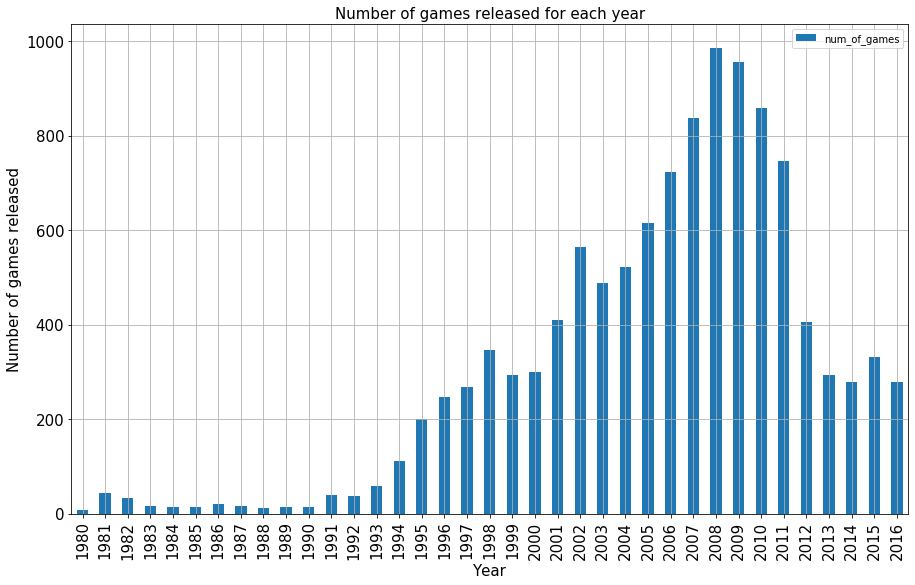

In [16]:
games_per_year.plot(x = 'year_of_release', y = 'num_of_games', kind = 'bar', figsize = (15,9), grid = True, fontsize = 15)
plt.title('Number of games released for each year', fontsize = 15)
plt.ylabel('Number of games released', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

**Looks like the rise of the video gaming started at the 90's and made yearly leaps until its peak at 2008 and decending ever since.**

### Sales varied from platform to platform

In [17]:
platform_sales = games_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index()
platform_sales = platform_sales.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True)
platform_sales.head()

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


In [18]:
platform_by_year = games_data.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum').reset_index()
platform_by_year['total_sales'] = platform_by_year.sum(axis = 1)
platform_by_year.columns = platform_by_year.columns.astype(str)
platform_by_year.sort_values(by = 'total_sales', ascending = False).head().reset_index(drop = True)

year_of_release,platform,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,total_sales
0,ps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
1,x360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
2,ps3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
3,wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
4,ds,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,...,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.78


In [19]:
ps2 = games_data.loc[games_data.platform == 'ps2', 'year_of_release']
x360 = games_data.loc[games_data.platform == 'x360', 'year_of_release']
ps3 = games_data.loc[games_data.platform == 'ps3', 'year_of_release']
wii = games_data.loc[games_data.platform == 'wii', 'year_of_release']
ds = games_data.loc[games_data.platform == 'ds', 'year_of_release']

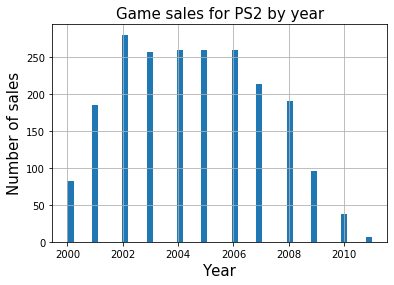

In [20]:
ps2.hist(bins = 50)
plt.title('Game sales for PS2 by year', fontsize = 15)
plt.ylabel('Number of sales', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

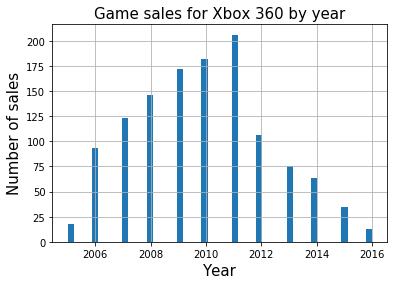

In [21]:
x360.hist(bins = 50)
plt.title('Game sales for Xbox 360 by year', fontsize = 15)
plt.ylabel('Number of sales', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

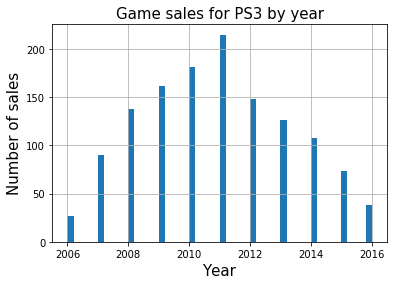

In [22]:
ps3.hist(bins = 50)
plt.title('Game sales for PS3 by year', fontsize = 15)
plt.ylabel('Number of sales', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

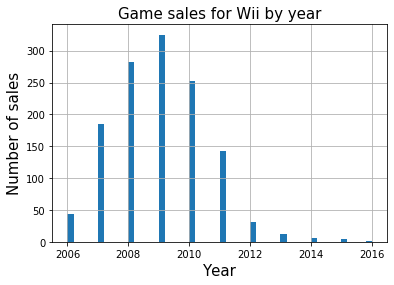

In [23]:
wii.hist(bins = 50)
plt.title('Game sales for Wii by year', fontsize = 15)
plt.ylabel('Number of sales', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

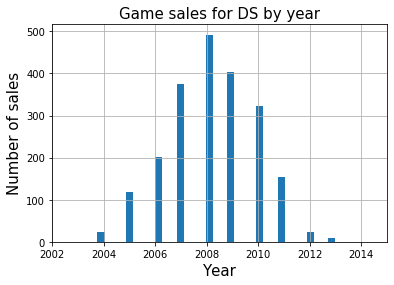

In [24]:
ds.hist(bins = 100)
plt.xlim(2002,2015)
plt.title('Game sales for DS by year', fontsize = 15)
plt.ylabel('Number of sales', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()

In [25]:
platform_by_group = pd.DataFrame(data = platform_by_year['platform'])
platform_by_group['80_to_84'] = platform_by_year['1980.0'] + platform_by_year['1981.0'] + platform_by_year['1982.0'] + platform_by_year['1983.0'] + platform_by_year['1984.0']
platform_by_group['84_to_87'] = platform_by_year['1985.0'] + platform_by_year['1986.0'] + platform_by_year['1987.0'] + platform_by_year['1988.0']
platform_by_group['88_to_91'] = platform_by_year['1989.0'] + platform_by_year['1990.0'] + platform_by_year['1991.0'] + platform_by_year['1992.0']
platform_by_group['92_to_95'] = platform_by_year['1993.0'] + platform_by_year['1994.0'] + platform_by_year['1995.0'] + platform_by_year['1996.0']
platform_by_group['96_to_99'] = platform_by_year['1997.0'] + platform_by_year['1998.0'] + platform_by_year['1999.0'] + platform_by_year['2000.0']
platform_by_group['00_to_03'] = platform_by_year['2001.0'] + platform_by_year['2002.0'] + platform_by_year['2003.0'] + platform_by_year['2004.0']
platform_by_group['04_to_07'] = platform_by_year['2005.0'] + platform_by_year['2006.0'] + platform_by_year['2007.0'] + platform_by_year['2008.0']
platform_by_group['08_to_11'] = platform_by_year['2009.0'] + platform_by_year['2010.0'] + platform_by_year['2011.0'] + platform_by_year['2012.0']
platform_by_group['13_to_16'] = platform_by_year['2013.0'] + platform_by_year['2014.0'] + platform_by_year['2015.0'] + platform_by_year['2016.0']
platform_by_group['total_sales'] = platform_by_year['total_sales'] 

platform_by_group.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True).head(10)


,platform,80_to_84,84_to_87,88_to_91,92_to_95,96_to_99,00_to_03,04_to_07,08_to_11,13_to_16,total_sales
0,ps2,NaN,NaN,NaN,NaN,NaN,767.93,393.97,NaN,NaN,1233.56
1,x360,NaN,NaN,NaN,NaN,NaN,NaN,290.54,533.90,136.80,961.24
2,ps3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.24,181.43,931.34
3,wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416.28,13.66,891.18
4,ds,NaN,NaN,NaN,NaN,NaN,NaN,542.20,241.75,NaN,802.78
5,ps,NaN,NaN,NaN,NaN,546.56,NaN,NaN,NaN,NaN,727.58
6,ps4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,314.14,314.14
7,gba,NaN,NaN,NaN,NaN,NaN,270.27,NaN,NaN,NaN,312.88
8,psp,NaN,NaN,NaN,NaN,NaN,NaN,180.64,98.33,NaN,289.53
9,3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.25,257.81


In [26]:
appear_fade = platform_by_year.sort_values(by = 'total_sales', ascending = False).reset_index(drop = True).head(10).drop(labels = [1, 2, 3, 6, 9], axis = 0)
appear_fade.reset_index(inplace = True, drop = True)
appear_fade

year_of_release,platform,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,total_sales
0,ps2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
1,ds,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,...,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.78
2,ps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.58
3,gba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.88
4,psp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,289.53


**Grouped the yearly sales to periods to see more clearly. Filtered 5 platforms with high total sales that used to be popular but now have zero sales.**

In [27]:
appear_fade_reverse = pd.DataFrame([])
appear_fade_reverse['ps2'] = appear_fade.loc[0]
appear_fade_reverse['ds'] = appear_fade.loc[1]
appear_fade_reverse['ps'] = appear_fade.loc[2]
appear_fade_reverse['gba'] = appear_fade.loc[3]
appear_fade_reverse['psp'] = appear_fade.loc[4]
appear_fade_reverse.drop(labels = ['platform', 'total_sales'], axis = 0, inplace = True)
appear_fade_reverse.reset_index(inplace = True)
appear_fade_reverse = appear_fade_reverse.astype('float')
appear_fade_reverse = appear_fade_reverse.query('year_of_release >= 1993')
appear_fade_reverse

,year_of_release,ps2,ds,ps,gba,psp
13,1993.0,NaN,NaN,NaN,NaN,NaN
14,1994.0,NaN,NaN,6.03,NaN,NaN
15,1995.0,NaN,NaN,35.96,NaN,NaN
16,1996.0,NaN,NaN,94.70,NaN,NaN
17,1997.0,NaN,NaN,136.17,NaN,NaN
18,1998.0,NaN,NaN,169.49,NaN,NaN
19,1999.0,NaN,NaN,144.53,NaN,NaN
20,2000.0,39.17,NaN,96.37,0.07,NaN
21,2001.0,166.43,NaN,35.59,61.53,NaN
22,2002.0,205.38,NaN,6.67,74.16,NaN


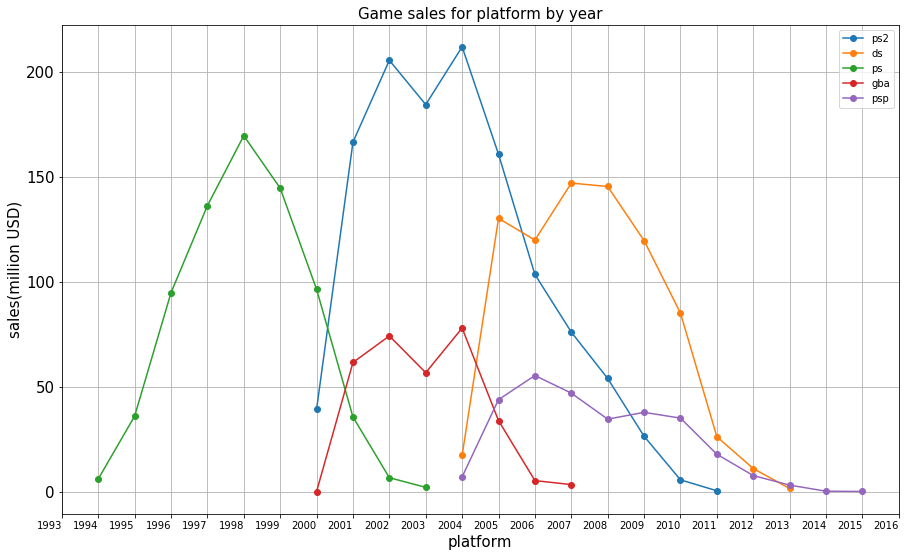

In [28]:
ax = appear_fade_reverse.plot.scatter(x = 'year_of_release', y = 'ps2', fontsize = 15, xticks = appear_fade_reverse['year_of_release'])
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)

plt.title('Game sales for platform by year', fontsize = 15)
appear_fade_reverse.plot(x='year_of_release', y=['ps2','ds', 'ps', 'gba', 'psp'], ax=ax, figsize = (15, 9), grid = True, style = 'o-')
ax.set_ylabel('sales(million USD)', fontsize = 15)
ax.set_xlabel('platform', fontsize = 15)
plt.show()

**It looks like most platforms reach close to the top of their sales after two years, with an exception of psp that rised lineary until its peak after 4 years.**

**For the psp, it was at its peak only for one year and then dropped lineary. Other platforms on the other hand, stayed on their peak for about 2-4 years and then started to go down in a span of 3-5 years for ps and gba and 6-9 years for psp, ds and ps2.**

**Since it takes around 2 years for a platform to gain popularity and reach the top of its sales, So we will focus on platforms that came out at around 2015 and advertise new games for those platforms.**



In [29]:
modern_platforms = platform_by_year[platform_by_year['2016.0'].notna()]
modern_platforms = modern_platforms.filter(['platform','2013.0', '2014.0', '2015.0', '2016.0', 'total_sales'])
modern_platforms = modern_platforms.sort_values(by = '2016.0', ascending = False).reset_index(drop = True).head(5)
modern_platforms

year_of_release,platform,2013.0,2014.0,2015.0,2016.0,total_sales
0,ps4,25.99,100.00,118.90,69.25,314.14
1,xone,18.96,54.07,60.14,26.15,159.32
2,3ds,56.57,43.76,27.78,15.14,257.81
3,pc,12.38,13.28,8.52,5.25,255.76
4,wiiu,21.65,22.03,16.35,4.60,82.19


**I'll take the top 5 platforms that are still selling in 2016 and see whether the sales are growing or shrinking.**

In [30]:
modern_platforms = platform_by_year[platform_by_year['2016.0'].notna()]
modern_platforms_reverse = modern_platforms.sort_values(by = '2016.0', ascending = False).reset_index(drop = True).head(5)
modern_platforms_reverse

year_of_release,platform,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,total_sales
0,ps4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
1,xone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15,159.32
2,3ds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,257.81
3,pc,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,0.03,...,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,255.76
4,wiiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60,82.19


In [31]:
modern_platforms = platform_by_year[platform_by_year['2016.0'].notna()]
modern_platforms = modern_platforms.sort_values(by = '2016.0', ascending = False).reset_index(drop = True).head(5)
modern_platforms_reverse = pd.DataFrame([])
modern_platforms_reverse['ps4'] = modern_platforms.loc[0]
modern_platforms_reverse['xone'] = modern_platforms.loc[1]
modern_platforms_reverse['3ds'] = modern_platforms.loc[2]
modern_platforms_reverse['pc'] = modern_platforms.loc[3]
modern_platforms_reverse['wiiu'] = modern_platforms.loc[4]
modern_platforms_reverse.drop(labels = ['platform', 'total_sales'], axis = 0, inplace = True)
modern_platforms_reverse.reset_index(inplace = True)
modern_platforms_reverse = modern_platforms_reverse.astype('float')
modern_platforms_reverse = modern_platforms_reverse.query('year_of_release >= 2010')

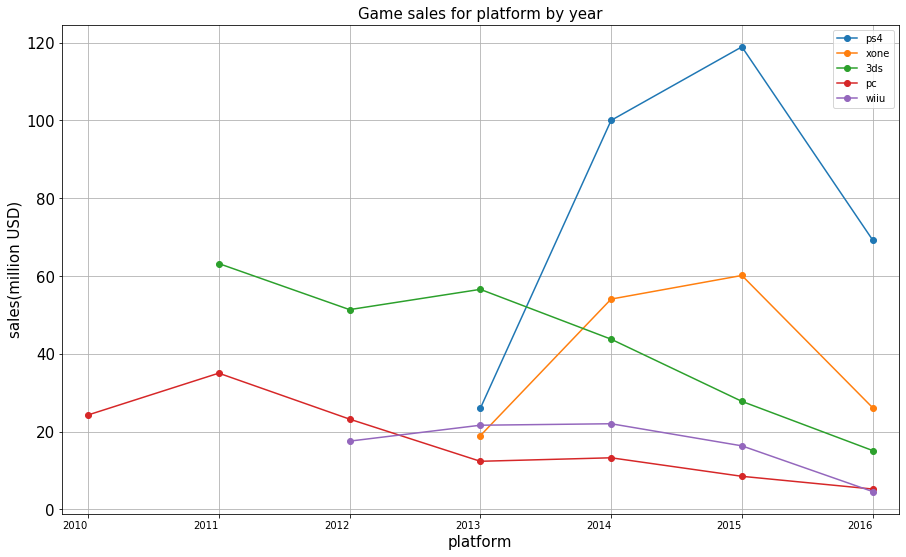

In [32]:
ax = modern_platforms_reverse.plot.scatter(x = 'year_of_release', y = 'ps4', fontsize = 15, xticks = modern_platforms_reverse['year_of_release'])
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)

plt.title('Game sales for platform by year', fontsize = 15)
modern_platforms_reverse.plot(x='year_of_release', y=['ps4','xone', '3ds', 'pc', 'wiiu'], ax=ax, figsize = (15, 9), grid = True, style = 'o-')
ax.set_ylabel('sales(million USD)', fontsize = 15)
ax.set_xlabel('platform', fontsize = 15)
ax.set_xlim(2009.8, 2016.2)
plt.show()

**Looks like all of the modern platforms are shrinking in sales. If the fading estimate is 3-5 years, the 3ds is soon to fade and so is the wiiu. pc seems more stable though it have lower sales, and looks like it will have the same amount of sales as the 3DS next year. The top platforms are ps4 and xbox one, they both had their peak at 2015 so we still forcast a drop at sales but it looks like these two will be the most profitable.**

**In conclusion, we should focus on ps4, xbox one with games that were released in the years 2014-2017.** 

**In addition, it looks like all the major platforms are fading, so I would strongly recommend researching for future release of new platforms and maybe save some advertise budget for the rise of the new platforms.**

In [33]:
modern_data = games_data.query('(platform == "ps4" | platform == "xone" | platform == "3ds" | platform == "pc" | platform == "wiiu") & year_of_release > 2013').reset_index(drop = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77ca8fa790>]],
      dtype=object)

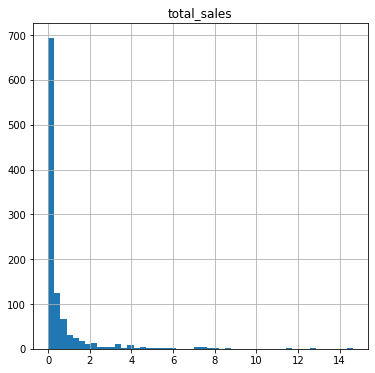

In [34]:
modern_data.hist('total_sales', bins = 50, figsize = (6, 6))

**In the histogram we can see there are outliers, but I don't think they are anomalies because some games are far more popular than others. That's why I won't drop the outliers.**

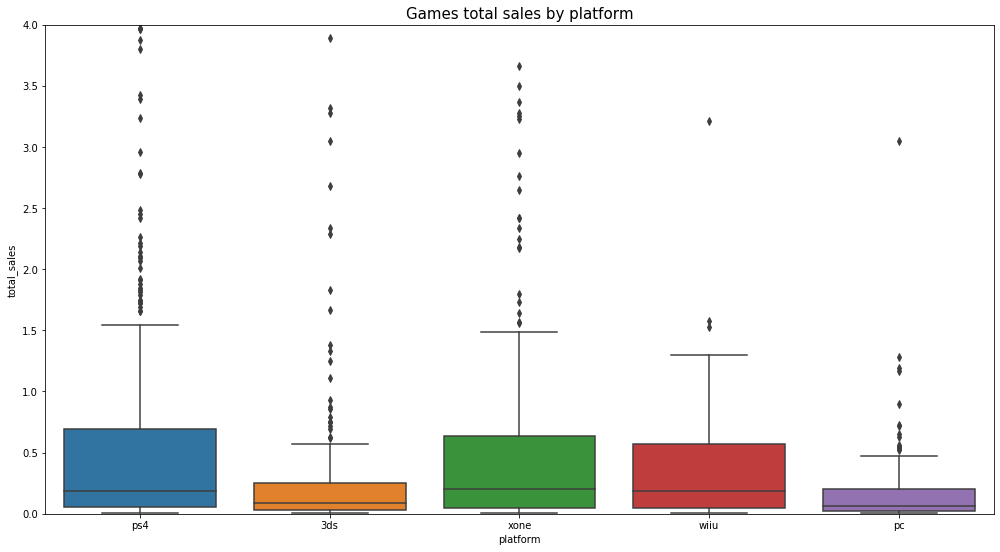

In [35]:
plt.figure(figsize=(17,9))
sns.boxplot(x ='platform', y ='total_sales', data = modern_data)
plt.title('Games total sales by platform', fontsize = 15)
plt.ylim(0, 4)
plt.show()

**In the boxplot we can see the median sales for game in Xbox ONE, PS4 and WiiU are pretty much the same, but for the PS4, Q3 is a bit higher which means in the range between Q1-Q3 ps4 is more profitable, and after it comes the Xbox ONE and WiiU is 3rd.**

**In addition we can see the MAX value of the ps4 is the highest and also it has much more values past the MAX line.**

**Interesting to see that although the WiiU is last in total sales, it has higher median, Q3 and MAX than PC and 3DS. Also the 3DS is 3rd in total sales but have low median Q3 and MAX. We now can see it has lot of outliers - spcific games that had lots of sales, maybe we should focus on them for the 3DS advertise.**

**With the boxplot and the graph "Game sales for platform by year" above we can clearly say that PS4 is the most profitable.**

In [36]:
ps4_data = modern_data.query('platform == "ps4"')
ps4_data = ps4_data.dropna()
ps4_data.reset_index(drop = True, inplace = True)

In [37]:
correlation = ps4_data['user_score'].corr(ps4_data['critic_score'])
print('correlation between the critics and users scores: ', correlation)
correlation = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('correlation between the users scores and total sales: ', correlation)
correlation = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('correlation between the critics and total sales: ', correlation)

correlation between the critics and users scores:  0.5595571074144294
correlation between the users scores and total sales:  -0.04198779958143566
correlation between the critics and total sales:  0.40080804736482517


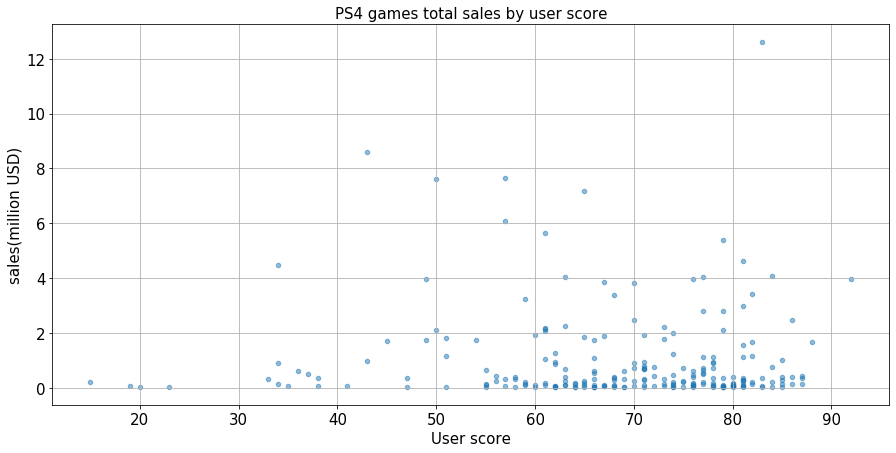

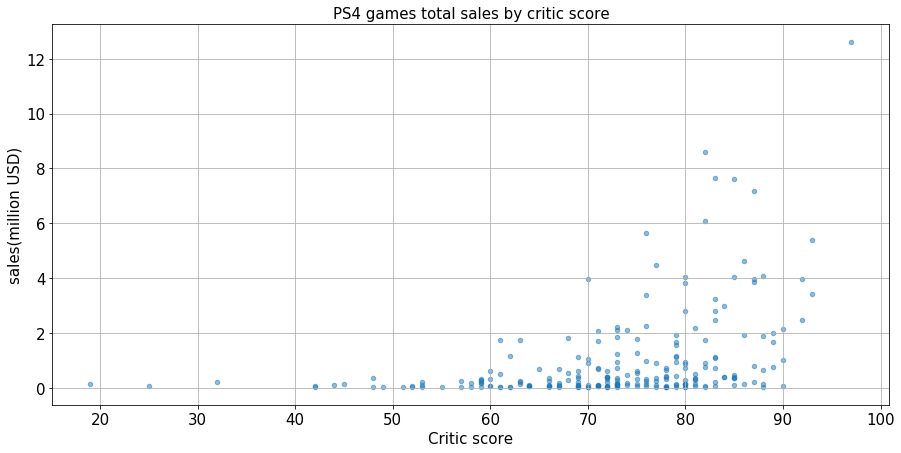

In [38]:
ax = ps4_data.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', figsize = (15, 7), grid = True, fontsize = 15, alpha = 0.5)
plt.title('PS4 games total sales by user score', fontsize = 15)

ax.set_ylabel('sales(million USD)', fontsize = 15)
ax.set_xlabel('User score', fontsize = 15)

ax = ps4_data.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', figsize = (15, 7), grid = True, fontsize = 15, alpha = 0.5)
plt.title('PS4 games total sales by critic score', fontsize = 15)
ax.set_ylabel('sales(million USD)', fontsize = 15)
ax.set_xlabel('Critic score', fontsize = 15)
plt.show()

**With correlation of 0.57 there's a weak correlation between the scores, that confirms we can't fill user scores with critic scores and vise versa.**

**For the user score, there is negative correlation between the score and the sales. and we can see in the scatter plot there are games with lower score that sold a lot.**

**For the critic scores, there is a positive correlation between the score and the sales. and we can clearly see a rise in the sales as the critic score goes up.**

In [39]:
ps4_names_list = pd.DataFrame(data = ps4_data['name'])
ps4_names_list['name']
compare_other_platforms = modern_data.query('~(platform == "ps4")')
compare_other_platforms = compare_other_platforms.merge(ps4_names_list, on = 'name')

**Filtering the same games for the other platforms.**

In [40]:
correlation = compare_other_platforms['user_score'].corr(ps4_data['total_sales'])
print('correlation between the users scores and total sales: ', correlation)
correlation = compare_other_platforms['critic_score'].corr(ps4_data['total_sales'])
print('correlation between the critics and total sales: ', correlation)

correlation between the users scores and total sales:  -0.15704375643940455
correlation between the critics and total sales:  0.31661236319064356


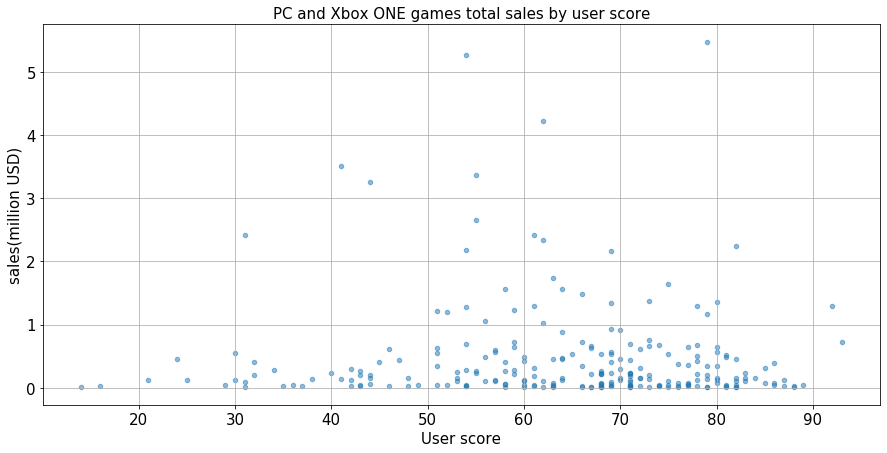

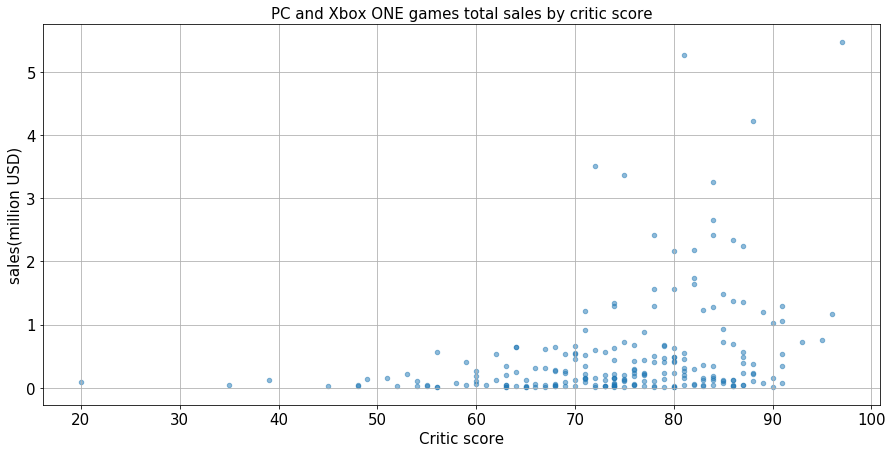

In [41]:
ax = compare_other_platforms.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', figsize = (15, 7), grid = True, fontsize = 15, alpha = 0.5)
plt.title('PC and Xbox ONE games total sales by user score', fontsize = 15)

ax.set_ylabel('sales(million USD)', fontsize = 15)
ax.set_xlabel('User score', fontsize = 15)

ax = compare_other_platforms.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', figsize = (15, 7), grid = True, fontsize = 15, alpha = 0.5)
plt.title('PC and Xbox ONE games total sales by critic score', fontsize = 15)
ax.set_ylabel('sales(million USD)', fontsize = 15)
ax.set_xlabel('Critic score', fontsize = 15)
plt.show()

**With the xbox one and pc, we can see the same pattern of negatice correlation between the users score and the sales and positive correlation between the critics score and the sales.**

**Also the scatter plot looks pretty muc the same with lower user score games that have lots of sales and a rise in sales as the critic score goes up.**

### Games by genre

Text(0.5, 0, 'Genre')

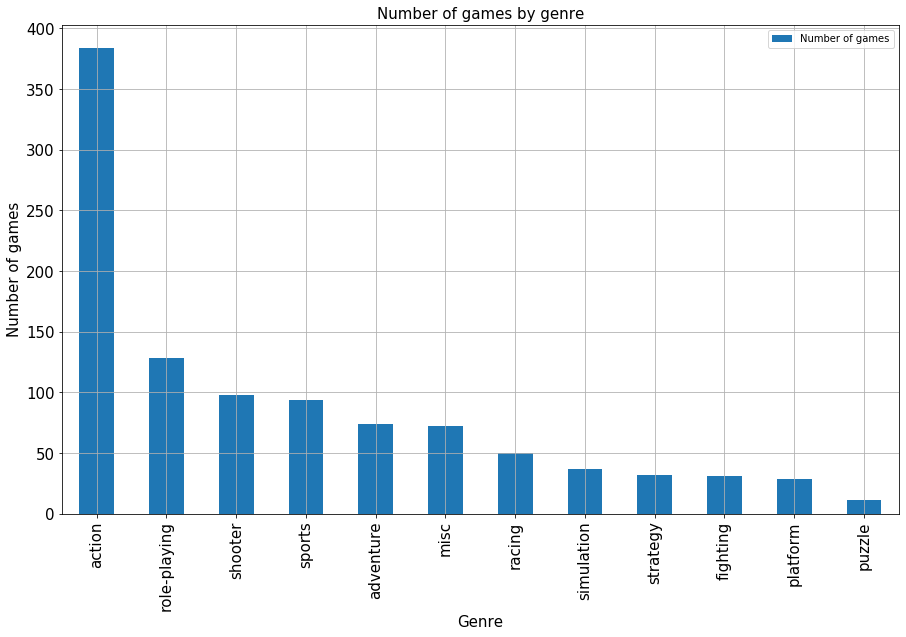

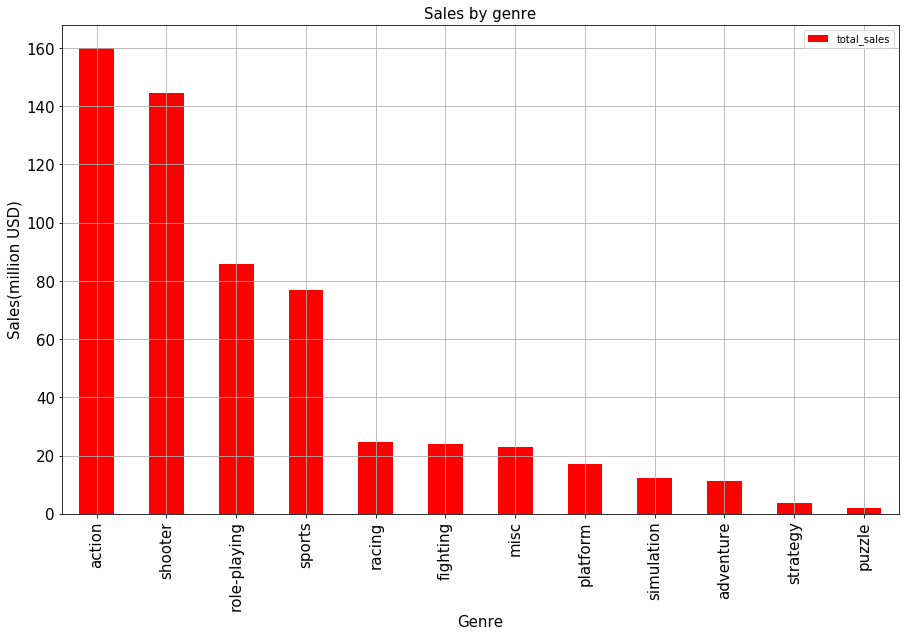

In [42]:
sales_by_genre = modern_data.groupby('genre')['name'].count().to_frame().sort_values(by = 'name', ascending = False)
sales_by_genre.drop_duplicates(subset = 'name', inplace = True)
ax = sales_by_genre.plot(kind = 'bar', figsize = (15,9), grid = True, fontsize = 15)
ax.legend(['Number of games'])
plt.title('Number of games by genre', fontsize = 15)
ax.set_ylabel('Number of games', fontsize = 15)
ax.set_xlabel('Genre', fontsize = 15)

sales_by_genre = modern_data.groupby('genre')['total_sales'].sum().to_frame().sort_values(by = 'total_sales', ascending = False)
ax = sales_by_genre.plot(kind = 'bar', figsize = (15,9), grid = True, fontsize = 15, color = 'red')
plt.title('Sales by genre', fontsize = 15)
ax.set_ylabel('Sales(million USD)', fontsize = 15)
ax.set_xlabel('Genre', fontsize = 15)

In [43]:
sales_by_genre = modern_data.groupby('genre')['total_sales'].mean().to_frame().sort_values(by = 'total_sales', ascending = False).reset_index()
sales_by_genre.set_axis(['genre', 'game_sales_mean'], axis = 1, inplace =True)
sales_by_genre_median = modern_data.groupby('genre')['total_sales'].median().to_frame().sort_values(by = 'total_sales', ascending = False).reset_index()
sales_by_genre_median.set_axis(['genre', 'game_sales_median'], axis = 1, inplace =True)
sales_by_genre = sales_by_genre.merge(sales_by_genre_median, on = 'genre')
sales_by_genre

,genre,game_sales_mean,game_sales_median
0,shooter,1.474184,0.540
1,sports,0.816596,0.240
2,fighting,0.773548,0.160
3,role-playing,0.671484,0.200
4,platform,0.584483,0.190
5,racing,0.495600,0.100
6,action,0.416849,0.110
7,simulation,0.331892,0.110
8,misc,0.319444,0.105
9,puzzle,0.191818,0.060


**The genre with the most different games and most profit is action. After it, though role_playing has moe variety,  the shooter genre is more profitable. The three most profitable genres are shooters, action and role-playing. 
Adventure, platform, simulation, strategy and puzzels have much lower sales and I wouldn't reccomend investing in their advertise too much.**

**In the mean and median table, we can see that although action genre leads in sales and number of games, the mean and median sales for a game is fairly low. Probably there are few specific action games that have a very big share of he market and raise the action genre sales.**

### Conclusion

**After analysing the data, we came to conclusion, the best games to advertise in 2017, are shooters, action and sports games that have been released between the years 2014-2016, have high critic score and are made for the PS4 and Xbox ONE platforms.**

## Create a user profile for each region

### Region sales by platform

In [44]:
na_data = modern_data.filter(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'user_score', 'rating'])
eu_data = modern_data.filter(['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'user_score', 'rating'])
jp_data = modern_data.filter(['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'user_score', 'rating'])

na_platform = na_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index().head(5)
eu_platform = eu_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index().head(5)
jp_platform = jp_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index().head(5)

In [45]:
na_total = na_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na_total = na_total['na_sales'].sum()
eu_total = eu_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eu_total = eu_total['eu_sales'].sum()
jp_total = jp_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jp_total = jp_total['jp_sales'].sum()

In [46]:
jp_platform['jp_sales_%'] = (jp_platform['jp_sales'] / jp_total) * 100
eu_platform['eu_sales_%'] = (eu_platform['eu_sales'] / eu_total) * 100
na_platform['na_sales_%'] = (na_platform['na_sales'] / na_total) * 100

In [47]:
region_platforms = jp_platform.join(na_platform, lsuffix = '_jp', rsuffix = '_na').join(eu_platform)
region_platforms

,platform_jp,jp_sales,jp_sales_%,platform_na,na_sales,na_sales_%,platform,eu_sales,eu_sales_%
0,3ds,44.24,66.138436,ps4,98.61,43.040461,ps4,130.04,58.175636
1,ps4,15.02,22.454776,xone,81.27,35.472044,xone,46.25,20.690735
2,wiiu,7.31,10.928390,3ds,22.64,9.881716,pc,17.97,8.039189
3,xone,0.32,0.478397,wiiu,19.36,8.450089,3ds,16.12,7.211560
4,pc,0.00,0.000000,pc,7.23,3.155689,wiiu,13.15,5.882879


**In both EU and NA the top platforms are PS4 and Xbox one, while in the NA market they have difference of 6%, in the EU market, the difference between the sales of PS4 and Xbox one is more than 35%. After them, with the same market share, comes #DS and WiiU in NA and PC and 3DS in EU. last with very small share are PC in NA and WiiU in EU.**

**In the Japanese, the top platform with more than 65% is 3DS the reason for it might be because the manufacturer of the platform, Nintendo, is a Japanese company. Another possible reason might be, Japanese prefer portable consoles much more than the Americans or Europeans.
After the 3DS comes again the PS4 with 22%, much less than in other markets, We can spot another Japanese console at the 3rd place, WiiU with 11% which is relatively high compared to EU and NA. and the last two with close to no sales Xbox ONE and PC.**


### Region sales by genre

In [48]:
jp_genres = jp_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index().head(5)
eu_genres = eu_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index().head(5)
na_genres = na_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index().head(5)

In [49]:
jp_total = jp_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jp_total = jp_total['jp_sales'].sum()
eu_total = eu_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eu_total = eu_total['eu_sales'].sum()
na_total = na_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
na_total = na_total['na_sales'].sum()

In [50]:
jp_genres['jp_sales_%'] = (jp_genres['jp_sales'] / jp_total) * 100
eu_genres['eu_sales_%'] = (eu_genres['eu_sales'] / eu_total) * 100
na_genres['na_sales_%'] = (na_genres['na_sales'] / na_total) * 100

In [51]:
region_genres = jp_genres.join(na_genres, lsuffix = '_jp', rsuffix = '_na').join(eu_genres)
region_genres

,genre_jp,jp_sales,jp_sales_%,genre_na,na_sales,na_sales_%,genre,eu_sales,eu_sales_%
0,role-playing,24.01,35.894753,shooter,65.97,28.794029,action,62.12,27.790453
1,action,19.81,29.615787,action,59.55,25.991882,shooter,56.07,25.083881
2,fighting,4.55,6.802213,sports,31.79,13.875431,sports,33.07,14.794435
3,shooter,4.20,6.278965,role-playing,29.17,12.731876,role-playing,25.44,11.381023
4,misc,3.32,4.963373,fighting,11.14,4.862293,racing,12.91,5.775511


**In Japan, the top genre is role-playing with more than third of the market. Not far behind, also with almost third of the market, are action games. After the top two there is a massive drop in the share percentages, with around 18% for the three bottom genres combined.**

**In EU and NA shooters and action games are the top two with relatively the same share, each takes 25-28% . After them comes sports genre with 114% for both and role-playing with 11-12% for both. The last places, both with 5% are fighting and racing genres**

### Region sales by rating

In [52]:
jp_rating = jp_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).reset_index()
eu_rating = eu_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).reset_index()
na_rating = na_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).reset_index()

In [53]:
jp_total = jp_data.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
jp_total = jp_total['jp_sales'].sum()
eu_total = eu_data.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
eu_total = eu_total['eu_sales'].sum()
na_total = na_data.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
na_total = na_total['na_sales'].sum()

In [54]:
jp_rating['jp_sales_%'] = (jp_rating['jp_sales'] / jp_total) * 100
eu_rating['eu_sales_%'] = (eu_rating['eu_sales'] / eu_total) * 100
na_rating['na_sales_%'] = (na_rating['na_sales'] / na_total) * 100

In [55]:
region_rating = jp_rating.join(na_rating, lsuffix = '_jp', rsuffix = '_na').join(eu_rating)
region_rating

,rating_jp,jp_sales,jp_sales_%,rating_na,na_sales,na_sales_%,rating,eu_sales,eu_sales_%
0,e,8.24,31.913246,m,81.44,46.834206,m,81.82,47.128622
1,t,7.94,30.751356,e,37.47,21.548105,e,45.50,26.208168
2,m,5.60,21.688613,t,31.70,18.229915,t,29.42,16.946028
3,e10+,4.04,15.646785,e10+,23.28,13.387774,e10+,16.87,9.717182


**In both NA and EU the Mature rating takes more than 45% of the market. It relates to the fact that the top genres in these regions are action and shooters. later comes E for Everyone with 20-25% and T for Teens with 17-18%.**

**In the Japanese market the top ratings are E and T with 32% for the former and 31% for the latter, they make more than 60% of the market. relates to the role-playing genre which is more moderate than shooter and action games. The M rating comes next with almost 22% and the last rating for all three regions is E10+**

### Coclusion

**EU and NA - Shooter or action games for Xbox ONE and PS4, with a rating that fits to mature and for everyone.**


**JP - Role-playing or action games for 3DS and PS4, with rating that fits for teenagers and everyone.**

## Test the following hypotheses

### 1) Average user ratings of the Xbox One and PC platforms are the same

`H0: Average user ratings of the Xbox One and PC platforms are the same`

`H1: Average user ratings of the Xbox One and PC platforms are different`

In [56]:
xone = games_data.query('platform == "xone"')
pc = games_data.query('platform == "pc"')
xone = xone.dropna(subset = ['user_score'])
pc = pc.dropna(subset = ['user_score'])
xone_score = xone['user_score'].tolist()
pc_score = pc['user_score'].tolist()

In [57]:
alpha = 0.05  

results = st.ttest_ind(xone_score, pc_score, equal_var  = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  4.935072360183428e-06
We reject the null hypothesis


**The p-value tells us that there is a very low probability of randomly getting a score that size or larger. This probability is too low and helps us conclude that there is a significant difference between the average user scores of the platforms.**

### 2) Average user ratings for the Action and Sports genres are different.

`H0: Average user ratings for the Action and Sports genres are different`

`H1: Average user ratings for the Action and Sports genres are the same`

In [58]:
action = games_data.query('genre == "action"')
sports = games_data.query('genre == "sports"')
action = action.dropna(subset = ['user_score'])
sports = sports.dropna(subset = ['user_score'])
action_score = action['user_score'].tolist()
sports_score = sports['user_score'].tolist()

In [59]:
results = st.ttest_ind(action_score, sports_score, equal_var  = False)

alpha = 0.05

print('p-value:', results.pvalue)

if results.pvalue > alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.1148381879149927
We reject the null hypothesis


**The p-value tells us that although the average user rating for the two genres is different, there is a 13% probability of randomly getting a difference that size or larger. This probability is high and tells us there is a no significant difference between the user rating of the genres.**


## Overall conclusion

**After making a user profile for each region, I can now filter specific games list by platform, genre and rating for each region and foresee exactly which games will be top seller in each region. With those lists we can easely custom our advertising for the different regions.**

### NA market

In [60]:
na_market = modern_data.query('(platform == "ps4" or platform == "xone") and (genre == "action" or genre == "shooter") and (rating == "m" or rating == "e")')
na_market = na_market.sort_values(by = 'na_sales', ascending = False).reset_index(drop = True).head(10)
na_market

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,83.0,m,12.62
1,call of duty: advanced warfare,xone,2014.0,shooter,3.22,1.55,0.01,0.48,81.0,54.0,m,5.26
2,grand theft auto v,xone,2014.0,action,2.81,2.19,0.00,0.47,97.0,79.0,m,5.47
3,call of duty: advanced warfare,ps4,2014.0,shooter,2.81,3.48,0.14,1.23,83.0,57.0,m,7.66
4,gears of war: ultimate edition,xone,2015.0,shooter,2.61,0.33,0.00,0.34,82.0,75.0,m,3.28
5,assassin's creed: unity,xone,2014.0,action,2.27,0.90,0.00,0.33,72.0,41.0,m,3.50
6,halo: the master chief collection,xone,2014.0,shooter,1.91,1.00,0.03,0.29,85.0,72.0,m,3.23
7,titanfall,xone,2014.0,shooter,1.84,0.80,0.04,0.27,86.0,64.0,m,2.95
8,call of duty: infinite warfare,ps4,2016.0,shooter,1.61,2.00,0.15,0.71,77.0,34.0,m,4.47
9,batman: arkham knight,ps4,2015.0,action,1.53,1.69,0.10,0.64,87.0,76.0,m,3.96


### EU market 

In [61]:
eu_market = modern_data.query('(platform == "ps4" or platform == "xone") and (genre == "action" or genre == "shooter") and (rating == "m" or rating == "e")')
eu_market = eu_market.sort_values(by = 'eu_sales', ascending = False).reset_index(drop = True).head(10)
eu_market

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,83.0,m,12.62
1,call of duty: advanced warfare,ps4,2014.0,shooter,2.81,3.48,0.14,1.23,83.0,57.0,m,7.66
2,grand theft auto v,xone,2014.0,action,2.81,2.19,0.00,0.47,97.0,79.0,m,5.47
3,far cry 4,ps4,2014.0,shooter,1.13,2.18,0.10,0.63,85.0,77.0,m,4.04
4,battlefield 1,ps4,2016.0,shooter,1.10,2.15,0.21,0.61,88.0,84.0,m,4.07
5,assassin's creed: unity,ps4,2014.0,action,1.19,2.07,0.08,0.62,70.0,49.0,m,3.96
6,call of duty: infinite warfare,ps4,2016.0,shooter,1.61,2.00,0.15,0.71,77.0,34.0,m,4.47
7,assassin's creed syndicate,ps4,2015.0,action,0.81,1.99,0.07,0.52,76.0,68.0,m,3.39
8,watch dogs,ps4,2014.0,action,1.40,1.90,0.11,0.64,80.0,63.0,m,4.05
9,tom clancy's the division,ps4,2016.0,shooter,1.35,1.70,0.15,0.60,80.0,70.0,m,3.80


### JP market

In [62]:
jp_market = modern_data.query('(platform == "3ds" or platform == "ps4") and (genre == "action" or genre == "role-playing") and (rating == "t" or rating == "e")')
jp_market = jp_market.sort_values(by = 'jp_sales', ascending = False).reset_index(drop = True).head(10)
jp_market

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,monster hunter 4 ultimate,3ds,2014.0,role-playing,0.68,0.48,2.62,0.11,86.0,87.0,t,3.89
1,dragon quest viii: journey of the cursed king,3ds,2015.0,role-playing,0.00,0.00,0.86,0.00,NaN,NaN,t,0.86
2,kirby: planet robobot,3ds,2016.0,action,0.28,0.14,0.47,0.04,81.0,87.0,e,0.93
3,pokemon super mystery dungeon,3ds,2015.0,role-playing,0.48,0.35,0.34,0.08,69.0,88.0,e,1.25
4,tales of berseria,ps4,2016.0,role-playing,0.00,0.00,0.23,0.00,NaN,NaN,t,0.23
5,dragon ball: fusions,3ds,2016.0,role-playing,0.02,0.00,0.19,0.00,68.0,76.0,t,0.21
6,bravely second: end layer,3ds,2015.0,role-playing,0.17,0.10,0.18,0.03,81.0,74.0,t,0.48
7,the legend of zelda: tri force heroes,3ds,2015.0,action,0.53,0.33,0.17,0.08,73.0,76.0,e,1.11
8,7th dragon iii code: vfd,3ds,2015.0,role-playing,0.04,0.00,0.12,0.00,77.0,82.0,t,0.16
9,fate/extella: the umbral star,ps4,2016.0,action,0.00,0.00,0.11,0.00,NaN,NaN,t,0.11
